In [1]:
import pandas as pd
import numpy as np
from scipy import stats as sts

In [2]:
data = pd.read_csv('water.txt', sep='\t')
data.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [3]:
alpha = 0.05
set_ = data.mortality

set_.mean() - sts.t.ppf(1-alpha/2, df=len(set_)-1) * set_.std(ddof=1) / np.sqrt(len(set_))

1476.0833413552848

In [4]:
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

In [5]:
_tconfint_generic(set_.mean(), set_.std(ddof=1) / np.sqrt(len(set_)), len(set_)-1, alpha, 'two-sided')

(1476.0833413552848, 1572.2117406119285)

In [6]:
set_ = data[data['location']=='South'].mortality
set_.mean() - sts.t.ppf(1-alpha/2, df=len(set_)-1) * set_.std(ddof=1) / np.sqrt(len(set_)), set_.mean()\
+ sts.t.ppf(1-alpha/2, df=len(set_)-1) * set_.std(ddof=1) / np.sqrt(len(set_))

(1320.1517462936238, 1433.463638321761)

In [7]:
set_ = data[data['location']=='North'].mortality
set_.mean() - sts.t.ppf(1-alpha/2, df=len(set_)-1) * set_.std(ddof=1) / np.sqrt(len(set_)), set_.mean()\
+ sts.t.ppf(1-alpha/2, df=len(set_)-1) * set_.std(ddof=1) / np.sqrt(len(set_))

(1586.5605251961385, 1680.6394748038613)

In [8]:
set_ = data[data['location']=='South'].hardness
set_.mean() - sts.t.ppf(1-alpha/2, df=len(set_)-1) * set_.std(ddof=1) / np.sqrt(len(set_)), set_.mean()\
+ sts.t.ppf(1-alpha/2, df=len(set_)-1) * set_.std(ddof=1) / np.sqrt(len(set_))

(53.467198692036106, 86.07126284642544)

In [9]:
set_ = data[data['location']=='North'].hardness
set_.mean() - sts.t.ppf(1-alpha/2, df=len(set_)-1) * set_.std(ddof=1) / np.sqrt(len(set_)), set_.mean()\
+ sts.t.ppf(1-alpha/2, df=len(set_)-1) * set_.std(ddof=1) / np.sqrt(len(set_))

(21.422487285724255, 39.37751271427574)

In [10]:
n1 = 11037
n2 = 11034

a1 = 104
a2 = 189

p1 = a1 / n1
p2 = a2 / n2

In [11]:
p2 - p1 + sts.norm.ppf(1-0.05/2) * np.sqrt(p1*(1-p1)/n1 + p2*(1-p2)/n2)

0.010724297276960124

In [12]:
p2-p1

0.0077060239760047815

In [13]:
(p2 / (1-p2)) / (p1 / (1-p1))

1.8320539419087138

In [14]:
sample1 = np.zeros(shape=(n1,))
sample2 = np.zeros(shape=(n2,))

In [15]:
sample1[:a1] = 1
sample2[:a2] = 1

In [16]:
np.random.seed(0)

In [17]:
def get_bootstrap_sample(data, n_samples):
    np.random.seed(0)
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [18]:
ps1 = np.mean(get_bootstrap_sample(sample1, 1000), axis=1)
ps2 = np.mean(get_bootstrap_sample(sample2, 1000), axis=1)

In [19]:
chance1 = ps1 / (1 - ps1)

In [20]:
chance2 = ps2 / (1 - ps2)

In [21]:
np.percentile(chance2 / chance1, q=[2.5, 97.5])

array([1.63035462, 2.10397776])

In [23]:
sts.binom_test(67, 100, 0.75)

0.08222258891386608

In [24]:
data = pd.read_csv('pines.txt', sep='\t')
data.head()

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4


In [41]:
data['pine'] = 1

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

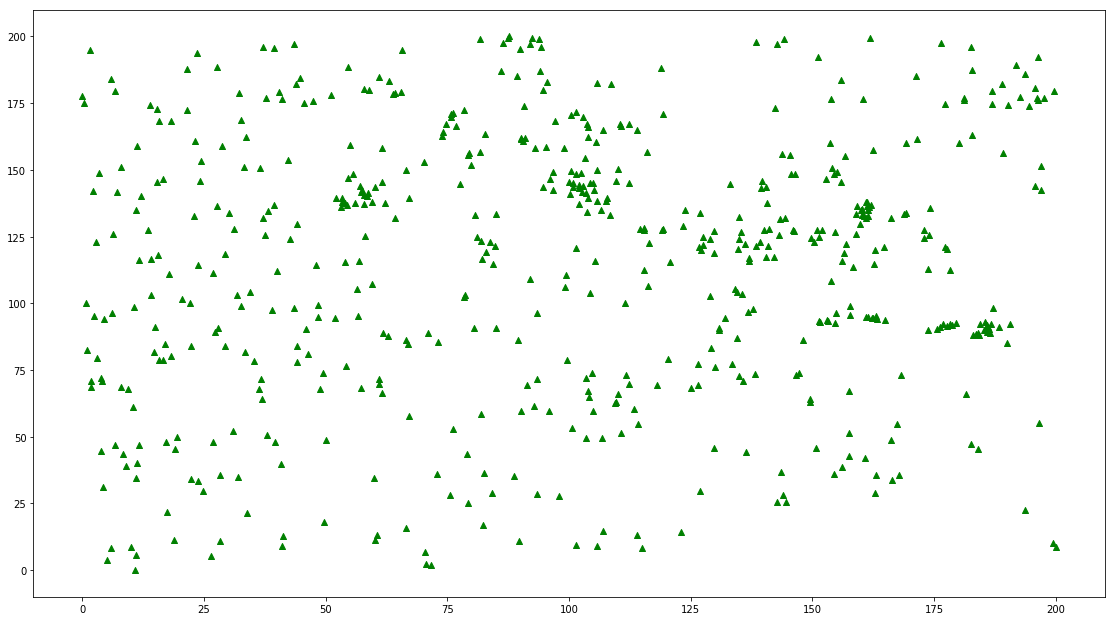

In [37]:
plt.figure(figsize=(19.20, 10.80))
plt.scatter(data['sn'], data['we'], color='g', marker='^')

In [52]:
stat, _, __, ___ = sts.binned_statistic_2d(data['sn'], data['we'], data['pine'], statistic='sum', bins=5)

In [55]:
stat.sum()

584.0

In [57]:
stat

array([[18., 26., 29., 25., 20.],
       [14., 12., 22., 34., 25.],
       [12., 24., 15., 50., 37.],
       [ 8., 19., 31., 50.,  7.],
       [ 7.,  8., 37., 27., 27.]])

In [58]:
584 / 25

23.36

In [59]:
expected = np.full(stat.shape, 23.36)

In [63]:
sts.chisquare(stat.ravel(), expected.ravel())

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.574669774967279e-20)